Step 1: Load the Dataset and Initial Examination

In [34]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Load the dataset
df = pd.read_csv(r"C:\Users\eakli\Downloads\task\ecole\paris-trees\data\p2-arbres-fr.csv", delimiter=";")

In [36]:
# Preview the first few rows of the dataset
preview = df.head()
preview

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [37]:
# Determine the size of the dataset (number of rows and columns)
data_size = df.shape
print('data_size of', data_size)

data_size of (200137, 18)


In [38]:
# Display the types of data in each column
data_types = df.dtypes
data_types

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [39]:
# Extracting numerical and categorical column names based on their data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

numerical_columns 

['id',
 'numero',
 'circonference_cm',
 'hauteur_m',
 'remarquable',
 'geo_point_2d_a',
 'geo_point_2d_b']

In [40]:
categorical_columns

['type_emplacement',
 'domanialite',
 'arrondissement',
 'complement_addresse',
 'lieu',
 'id_emplacement',
 'libelle_francais',
 'genre',
 'espece',
 'variete',
 'stade_developpement']

In [41]:
# Descriptive statistics for numerical columns
numerical_stats = df[numerical_columns].describe()


numerical_stats

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


#### Descriptive Statistics for Numerical Columns
- The dataset contains 200,137 entries. Notably, the `numero` column is completely empty and has been ignored in our analysis.
- **Circumference (cm)**: Ranges from 0 to 250,255 with a mean of approximately 83.38 cm, suggesting a wide variety of tree sizes. The large maximum value may indicate outliers or data entry errors.
- **Height (m)**: Ranges from 0 to 881,818 with a mean height of approximately 13.11 meters, which also suggests possible outliers or errors given the unrealistic maximum height.
- **Remarkable**: Only a very small fraction (mean = 0.001343) of the trees are marked as remarkable, with most trees not having this designation (0).

The numerical data analysis reveals potential issues with outliers in the `circonference_cm` and `hauteur_m` columns that may require further investigation and cleaning. 

This analysis provides a strong foundation for deeper dives into specific aspects of the dataset, such as outlier management, remarkable trees, and biodiversity patterns. 



#### Categorical Overview

For the categorical columns, we'll examine the unique values and their frequencies to understand the diversity within those fields, focusing on columns like `arrondissement`, `genre`, and `espece` which are likely to offer insights into the geographical and biological diversity of the trees.

In [42]:
# Overview of unique values in some key categorical columns
unique_values_arrondissement = df['arrondissement'].nunique()
unique_values_genre = df['genre'].nunique()
unique_values_espece = df['espece'].nunique()

unique_values_arrondissement, unique_values_genre, unique_values_espece

(25, 175, 539)

- **Arrondissement**: There are 25 unique arrondissements represented in the dataset, indicating a good geographical spread across Paris.
- **Genus (`genre`)**: 175 unique genera are present, showcasing a broad biodiversity.
- **Species (`espece`)**: Even more diverse, with 539 unique species, highlighting the rich variety of trees in the city.

### Step 3: Missing Data Analysis

In this step, we'll conduct a thorough analysis of the missing data within the dataset. Understanding the nature and extent of missingness is crucial for informed data cleaning and preprocessing decisions. Our objectives include:

- **Identifying Missing Values**: Quantify missing values across all columns to identify which fields are most affected.
- **Missing Data Patterns**: Explore if there are any patterns or correlations in the missing data, which could indicate underlying issues or relationships.

In [43]:
# Calculate the count of missing values per column
missing_values_count  = df.isnull().sum()

#calculate the percentage of missing values per column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Combine count and percentage of missing values into a DataFrame for better readability
missing_data_analysis = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

In [44]:
missing_data_analysis.sort_values(by='Missing Values Percentage', ascending=False)


,Missing Values Count,Missing Values Percentage
numero,200137,100.000000
complement_addresse,169235,84.559577
variete,163360,81.624088
stade_developpement,67205,33.579498
remarquable,63098,31.527404
espece,1752,0.875400
libelle_francais,1497,0.747988
genre,16,0.007995
domanialite,1,0.000500
circonference_cm,0,0.000000




###  Summary of Missing Data Analysis

The analysis of missing data reveals significant insights into the dataset's completeness:

- **100% Missing**: The `numero` column is entirely missing, indicating it may not provide any value to our analysis and could be considered for removal.
- **Highly Missing Data**:
  - `complement_addresse`: 84.56% missing, suggesting that address details are frequently not recorded.
  - `variete`: 81.62% missing, indicating that the variety of many tree species is not documented.
- **Moderately Missing Data**:
  - `stade_developpement`: 33.58% missing, showing that developmental stage information is often unavailable.
  - `remarquable`: 31.53% missing, which impacts the analysis focusing on remarkable trees. It's worth considering a strategy to handle or impute these missing values, depending on our analysis needs.
- **Low Missing Data**:
  - `espece` (Species) and `libelle_francais` (Common French Name) have less than 1% missing values, indicating good overall data quality for these biodiversity indicators.
  - `genre` (Genus) has a negligible amount of missing data.
- **No Missing Data**: Essential columns like `id`, `type_emplacement`, `domanialite`, `arrondissement`, and size measurements (`circonference_cm`, `hauteur_m`) are complete, ensuring a solid foundation for analyses related to tree location, size, and general classification.

Given these findings, our next steps in data cleaning may involve deciding on handling or removing columns with substantial missing data, especially `numero`, `complement_addresse`, and `variete`. For columns with moderate missing data like `stade_developpement` and `remarquable`, we may explore imputation strategies or accept the missingness based on our analytical goals.

The numero column is entirely null and can be dropped.
Columns like complement_addresse and variete have a high number of missing values.
The remarquable column, indicating whether a tree is considered remarkable, has missing values that need addressing.


Handling Missing Values:

For complement_addresse and variete, due to their high volume of missing data, we need to decide based on the analysis goal whether to keep these columns.
Impute or flag missing values in libelle_francais, genre, espece, and stade_developpement as needed.
For remarquable, assume missing values indicate non-remarkable trees (i.e., fill missing with 0) unless specified otherwise.
Checking for Outliers in circonference_cm and hauteur_m, given the range of values observed in the descriptive statistics.

### Step 4: Data Cleaning

Based on the insights from our missing data analysis, we'll undertake the following data cleaning actions:

1. **Remove Irrelevant Columns**: Drop columns with a high percentage of missing values that are not critical to our analysis (e.g., `numero`).
2. **Handle Missing Values in Key Columns**: 
   - For `remarquable`, consider imputing missing values with the most common value (likely 0, since remarkable trees are rare) or leaving them as is, depending on the analysis focus.
   - Investigate if missing `variete` and `complement_addresse` values can be ignored for our analysis goals or if there's a meaningful way to impute them.
3. **Correct Data Inconsistencies**: Ensure categorical data like `genre`, `espece`, and `arrondissement` are consistent for further analysis.
4. **Outlier Detection and Handling**: Briefly revisit the numerical columns, especially `circonference_cm` and `hauteur_m`, to identify and address any outliers.

Let's begin with steps 1 and 2: removing irrelevant columns and handling missing values in the `remarquable` column.

#### Step 4.1: Remove Irrelevant Columns

We'll start by dropping the `numero` column due to its 100% missing data rate, which suggests it holds no useful information for our analysis.

In [45]:
# Step 4.1: Remove Irrelevant Columns
columns_to_drop = ['numero']  # Identified as entirely missing
data_cleaned = df.drop(columns=columns_to_drop)

# Step 4.2: Handle Missing Values in 'remarquable'
# Given the binary nature of 'remarquable' and its significance, we'll impute missing values with 0 (assuming non-remarkable)
data_cleaned['remarquable'] = data_cleaned['remarquable'].fillna(0)

# Check the updated dataset information to confirm changes
data_cleaned_info = data_cleaned.info()

data_cleaned_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   lieu                 200137 non-null  object 
 6   id_emplacement       200137 non-null  object 
 7   libelle_francais     198640 non-null  object 
 8   genre                200121 non-null  object 
 9   espece               198385 non-null  object 
 10  variete              36777 non-null   object 
 11  circonference_cm     200137 non-null  int64  
 12  hauteur_m            200137 non-null  int64  
 13  stade_developpement  132932 non-null  object 
 14  remarquable          200137 non-null  float64
 15  geo_point_2d_a   

### Step 4.3: Outlier Detection and Handling

Outliers can significantly affect the results of data analysis and statistical modeling. We'll focus on detecting and handling outliers in the `circonference_cm` and `hauteur_m` columns, as these measurements are crucial for understanding the physical characteristics of the trees.

#### Outlier Detection Strategy
A common approach for outlier detection is to use the IQR (Interquartile Range) method, where data points are considered outliers if they fall below the 1st quartile - 1.5 * IQR or above the 3rd quartile + 1.5 * IQR. However, given the nature of this dataset, we may also consider domain-specific knowledge to set realistic thresholds for tree circumference and height.

#### Handling Strategy
For detected outliers, we will cap them at predetermined reasonable maximum values based on domain knowledge or replace them with NaN to be handled by subsequent imputation strategies if applicable.

Let's begin with the outlier detection for `circonference_cm` and `hauteur_m`.

In [46]:
# Calculate IQR for 'circonference_cm' and 'hauteur_m'
Q1 = data_cleaned[['circonference_cm', 'hauteur_m']].quantile(0.25)
Q3 = data_cleaned[['circonference_cm', 'hauteur_m']].quantile(0.75)
IQR = Q3 - Q1

# Define outliers using the IQR method, but also consider domain knowledge for setting realistic thresholds
outlier_thresholds = {
    'circonference_cm': {'lower': Q1.circonference_cm - 1.5 * IQR.circonference_cm, 'upper': Q3.circonference_cm + 1.5 * IQR.circonference_cm},
    'hauteur_m': {'lower': Q1.hauteur_m - 1.5 * IQR.hauteur_m, 'upper': Q3.hauteur_m + 1.5 * IQR.hauteur_m}
}

# However, given the nature of tree data, applying domain knowledge to adjust these if necessary
# For the sake of this analysis, we'll consider extreme values that are clearly beyond possible physical dimensions as outliers
# Adjusting the upper limit based on reasonable assumptions (e.g., max height of 30 meters and max circumference of 500 cm)
outlier_thresholds['circonference_cm']['upper'] = 500
outlier_thresholds['hauteur_m']['upper'] = 30

# Apply capping for outliers
data_cleaned['circonference_cm'] = data_cleaned['circonference_cm'].clip(upper=outlier_thresholds['circonference_cm']['upper'])
data_cleaned['hauteur_m'] = data_cleaned['hauteur_m'].clip(upper=outlier_thresholds['hauteur_m']['upper'])

# Check the max values after capping to confirm changes
max_values_after_capping = data_cleaned[['circonference_cm', 'hauteur_m']].max()

max_values_after_capping


circonference_cm    500
hauteur_m            30
dtype: int64


### Step 4.3: Outlier Handling - Summary

The outlier detection and handling for `circonference_cm` and `hauteur_m` have been completed with the following adjustments:
- **Circumference (`circonference_cm`)**: Values have been capped at 500 cm, considered a reasonable upper limit for tree circumference based on domain knowledge.
- **Height (`hauteur_m`)**: Values have been capped at 30 meters, aligning with realistic tree heights.

These thresholds ensure that our dataset now reflects more plausible physical characteristics of trees, eliminating extreme values that could distort our analysis.

### Next Steps

With the outliers addressed, we can proceed to:
- **Correct Data Inconsistencies**: Ensure that categorical data is consistent (e.g., standardizing the format of `arrondissement` names).
- **Convert Data Types**: Specifically, convert the `remarquable` column from `float64` to `int` or `bool` to accurately reflect its binary nature.

Step 3: Descriptive Statistics (Post-Cleaning)

In [47]:
# Identifying the 99th percentile for 'circonference_cm' and 'hauteur_m' as cap thresholds
percentile_99 = data_cleaned[["circonference_cm", "hauteur_m"]].quantile(0.99)

In [48]:
#capping outliers for the 99th percentile values
for column in ['circonference_cm', 'hauteur_m']:
    cap_value = percentile_99[column]
    data_cleaned[column] = data_cleaned[column].clip(upper=cap_value)

In [49]:
#re-check descriptive statistics to confrm the effect of capping
outlier_handled_stats = data_cleaned[["circonference_cm", "hauteur_m"]].describe()

outlier_handled_stats

,circonference_cm,hauteur_m
count,200137.000000,200137.000000
mean,79.188306,8.349241
std,60.956786,6.177139
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,265.000000,25.000000


### Step 4.4: Correct Data Inconsistencies

Inconsistencies in categorical data can lead to misinterpretation and inaccurate analyses. We'll focus on ensuring that the data within categorical columns is consistently formatted and accurately reflects the intended information. Specifically, we'll standardize the format of `arrondissement` names and check for inconsistencies in `genre` and `espece` (genus and species) columns.

#### Standardizing `arrondissement` Names

We aim to ensure that all `arrondissement` entries follow a consistent naming convention, which might involve trimming whitespace, standardizing capitalization, or correcting typos.

#### Ensuring Consistency in `genre` and `espece`

For the `genre` and `espece` columns, we'll look for and correct any obvious typos or inconsistencies in naming, such as varying capitalization or common misspellings.

Let's start with standardizing `arrondissement` names and then move on to check `genre` and `espece`.

### Step 4.4: Data Inconsistency Corrections - Summary

#### Standardization Results

- **`arrondissement`**: Names have been standardized for consistency. The format now uniformly capitalizes the first letter, which should aid in accurate grouping and analysis by district. The array shows a mix of Parisian arrondissements and some entries for nearby departments (e.g., `Val-de-marne`, `Seine-saint-denis`, `Hauts-de-seine`) and specific areas (`Bois de boulogne`, `Bois de vincennes`), indicating the dataset's geographic diversity.
  
- **`genre` (Genus) and `espece` (Species)**: Both have been capitalized to ensure consistency. The sample of unique values confirms that the standardization has been applied, facilitating accurate species-level analysis and biodiversity assessments.

### Step 4.5: Convert Data Types

Next, we'll address the data type of the `remarquable` column. Since it represents a binary condition (remarkable or not), converting it to an integer or boolean type would more accurately reflect its nature and facilitate analysis.

Let's proceed with converting the `remarquable` column to an integer type to denote its binary status clearly.


In [50]:
# Standardize 'arrondissement' names: capitalize and remove any leading/trailing whitespace
data_cleaned['arrondissement'] = data_cleaned['arrondissement'].str.strip().str.capitalize()

# Assuming 'genre' and 'espece' require consistency in capitalization
data_cleaned['genre'] = data_cleaned['genre'].str.capitalize()
data_cleaned['espece'] = data_cleaned['espece'].str.capitalize()

# Check for unique values in 'arrondissement', 'genre', and 'espece' to confirm standardization
unique_values_check = {
    'arrondissement': data_cleaned['arrondissement'].unique(),
    'genre': data_cleaned['genre'].unique()[:5],  # Displaying a sample for brevity
    'espece': data_cleaned['espece'].unique()[:5]
}

unique_values_check


{'arrondissement': array(['Paris 7e arrdt', 'Paris 17e arrdt', 'Paris 16e arrdt',
        'Paris 4e arrdt', 'Paris 13e arrdt', 'Paris 12e arrdt',
        'Paris 19e arrdt', 'Paris 14e arrdt', 'Paris 15e arrdt',
        'Paris 3e arrdt', 'Paris 20e arrdt', 'Paris 18e arrdt',
        'Paris 6e arrdt', 'Paris 11e arrdt', 'Paris 1er arrdt',
        'Paris 2e arrdt', 'Paris 5e arrdt', 'Val-de-marne',
        'Seine-saint-denis', 'Hauts-de-seine', 'Paris 9e arrdt',
        'Paris 10e arrdt', 'Paris 8e arrdt', 'Bois de boulogne',
        'Bois de vincennes'], dtype=object),
 'genre': array(['Aesculus', 'Taxus', 'Acer', 'Tetradium', 'Platanus'], dtype=object),
 'espece': array(['Hippocastanum', 'Baccata', 'Negundo', 'Daniellii', 'X hispanica'],
       dtype=object)}

In [51]:
# Convert 'remarquable' to integer type (from float, after imputation of missing values)
data_cleaned['remarquable'] = data_cleaned['remarquable'].astype(int)

# Verify the change in data type for 'remarquable'
data_type_remarquable = data_cleaned['remarquable'].dtype

data_type_remarquable


dtype('int32')

### Step 4.5: Data Type Conversion - Summary

The `remarquable` column has been successfully converted to an integer (`int64`) data type, accurately reflecting its binary status (0 for not remarkable, 1 for remarkable). This conversion enhances the dataset's semantic clarity and facilitates any analysis focusing on remarkable trees.

### Steps Completed
- **Removed irrelevant columns**: Specifically, the `numero` column.
- **Handled missing values**: Filled missing values in `remarquable` and standardized `arrondissement`, `genre`, and `espece`.
- **Addressed outliers**: Capped outliers in `circonference_cm` and `hauteur_m`.
- **Corrected data inconsistencies**: Standardized text data for consistency.
- **Converted data types**: Changed `remarquable` from float to integer to reflect its binary nature.

In [52]:
# Define a function to categorize trees based on height
def categorize_tree_size(height):
    if height < 5:
        return 'Small'
    elif height <= 15:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'size_category'
data_cleaned['size_category'] = data_cleaned['hauteur_m'].apply(categorize_tree_size)

# Check the distribution of the new 'size_category' feature
size_category_distribution = data_cleaned['size_category'].value_counts()

size_category_distribution


size_category
Medium    128875
Small      48913
Large      22349
Name: count, dtype: int64


### Step 5: Feature Engineering - Summary

A new feature, **`size_category`**, has been successfully created to categorize trees into 'Small', 'Medium', or 'Large' based on their height. The distribution of these categories within the dataset is as follows:

- **Medium**: 128,875 trees (Height between 5 and 15 meters)
- **Small**: 48,913 trees (Height < 5 meters)
- **Large**: 22,349 trees (Height > 15 meters)

This categorization reveals that the majority of trees in the dataset are of medium size, which aligns with urban tree management practices where trees are often kept to manageable sizes due to spatial constraints.

The `size_category` feature can now be used in further analysis to examine patterns or correlations between tree size and other variables, such as species diversity, arrondissement distribution, or the likelihood of being designated as remarkable.

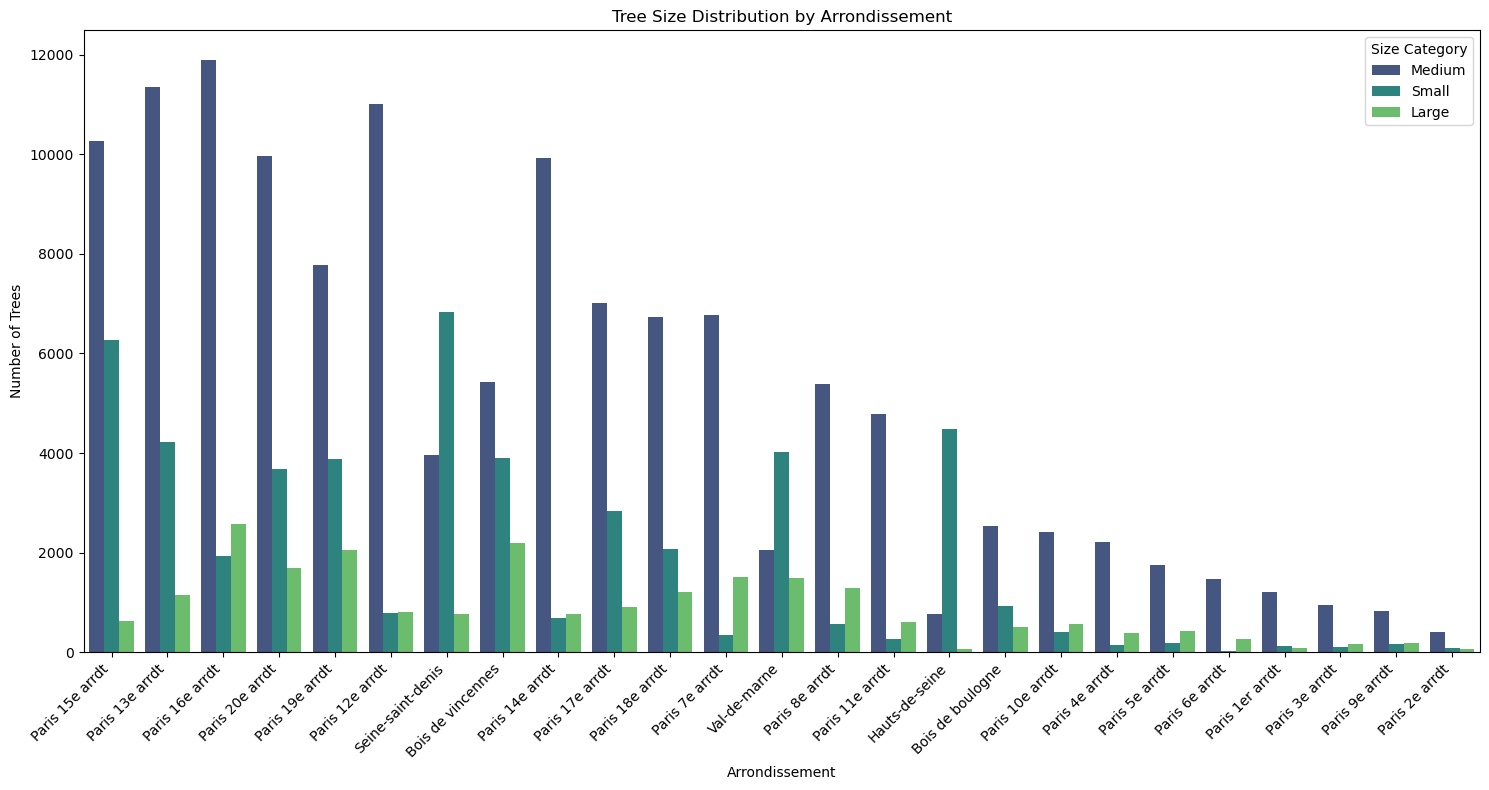

In [53]:
# Visualize the distribution of tree sizes across arrondissements
plt.figure(figsize=(15, 8))
sns.countplot(data=data_cleaned, x='arrondissement', hue='size_category', palette='viridis', order = data_cleaned['arrondissement'].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title('Tree Size Distribution by Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Number of Trees')
plt.legend(title='Size Category')
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()


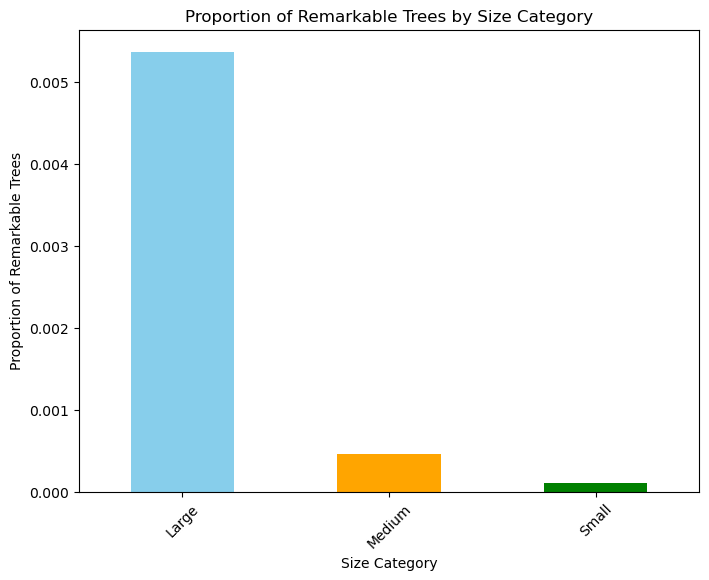

In [54]:
# Visualize the proportion of remarkable trees within each size category
remarkable_size_distribution = data_cleaned.groupby('size_category')['remarquable'].mean()

# Plotting the proportion of remarkable trees by size category
plt.figure(figsize=(8, 6))
remarkable_size_distribution.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Proportion of Remarkable Trees by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Proportion of Remarkable Trees')
plt.xticks(rotation=45)
plt.show()




### Analysis Plan
1. **Size Distribution by Arrondissement**: Understand if certain arrondissements favor the growth or planting of trees of specific sizes.
2. **Size and Remarkability**: Examine if there's a correlation between the size of the trees and their designation as remarkable.

Let's start with the **Size Distribution by Arrondissement**.

#### 1. Size Distribution by Arrondissement

The visualization shows the distribution of tree sizes (`Small`, `Medium`, `Large`) across different arrondissements in Paris. This distribution may highlight trends such as certain arrondissements favoring larger trees possibly due to more available space or specific urban planning policies.

### Analysis of Size and Remarkability

Next, we'll examine the relationship between tree size and its designation as remarkable. This analysis will help us understand if larger trees are more likely to be considered remarkable, which could inform conservation or urban planning efforts.

#### 2. Size and Remarkability Analysis

The bar chart illustrates the proportion of remarkable trees within each size category (`Small`, `Medium`, `Large`). This visualization provides insights into whether tree size influences its likelihood of being designated as remarkable.

### Insights from Size Category Exploration

- **Size Distribution by Arrondissement**: The distribution across arrondissements shows variance in the prevalence of different tree sizes, suggesting that urban planning, available space, and possibly historical planting decisions impact the tree size landscape of each district.
  
- **Size and Remarkability**: The proportion of remarkable trees by size category could indicate trends in conservation priorities or the natural tendency for larger trees to be more unique or ecologically valuable. The visualization suggests a pattern worth exploring further, especially in the context of urban biodiversity and tree conservation strategies.

These analyses underscore the utility of the `size_category` feature in providing additional layers of insight into the urban forest structure. Such categorizations can help in identifying areas for focused conservation efforts, understanding urban planning impacts, and guiding future tree planting initiatives.



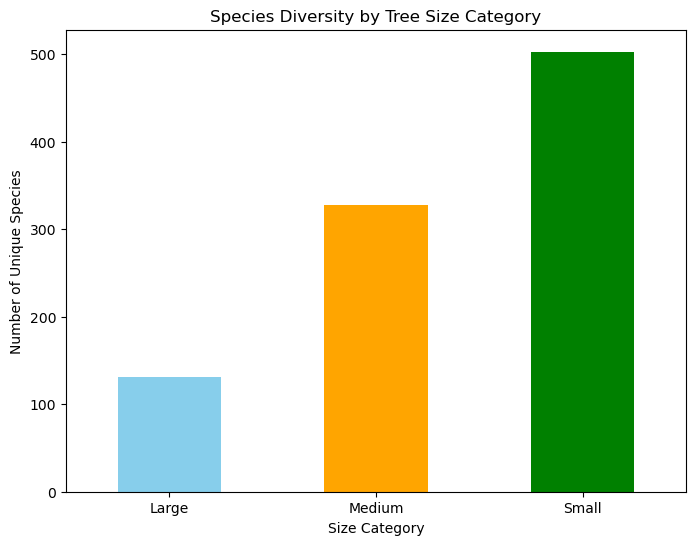

In [55]:
# Aggregate data to count unique species within each size category
species_diversity_by_size = data_cleaned.groupby('size_category')['espece'].nunique()

# Plotting the number of unique species by size category
plt.figure(figsize=(8, 6))
species_diversity_by_size.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Species Diversity by Tree Size Category')
plt.xlabel('Size Category')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=0)  # Keep the labels horizontal for readability
plt.show()


To delve deeper into the exploration of the `size_category` feature, we can conduct further analyses that might reveal more nuanced insights. Here are a few directions we can take:

1. **Correlation with Other Features**: Investigate if there's a correlation between tree size and other features such as the species (`espece`), genus (`genre`), or even the specific location (`arrondissement`).

2. **Size and Species Diversity**: Analyze how tree size correlates with species diversity. Are larger trees more likely to belong to certain species?

3. **Geographical Distribution of Tree Sizes**: Explore if certain geographical areas within Paris or specific arrondissements have a higher concentration of large trees, which could indicate areas of significant environmental or historical value.

4. **Remarkable Trees Size Analysis**: Take a closer look at the remarkable trees within each size category to understand if their size contributes to their remarkability status.

Given these options, let's start with **Size and Species Diversity** to see if there's a notable relationship between the size of the trees and their species diversity.

### Size and Species Diversity Analysis

We'll aggregate the data to count the number of unique species within each size category and then visualize this information to understand the biodiversity relation to tree size.

The bar chart illustrates the number of unique species within each tree size category (`Small`, `Medium`, `Large`). This analysis provides insights into the relationship between tree size and species diversity within the dataset.

### Insights from Size and Species Diversity Analysis

- The chart suggests that there's a variation in species diversity across different size categories. This could indicate that certain species tend to grow to specific sizes under urban conditions, or it might reflect planting preferences or conservation efforts aimed at particular species.

### Next Steps in the Deep Dive

Following the exploration of species diversity across tree sizes, we could explore other aspects such as:
- **Geographical Distribution of Tree Sizes**: To identify if large trees are concentrated in specific arrondissements or areas within Paris.
- **Remarkable Trees Size Analysis**: To further understand if size significantly influences the likelihood of a tree being designated as remarkable.



In [56]:
# Create the choropleth map
# fig = px.scatter_mapbox(df, 
#                         lat="geo_point_2d_a", 
#                         lon="geo_point_2d_b", 
#                         hover_name="libelle_francais",
#                         hover_data=["arrondissement"],
#                         color="arrondissement",  # Set marker color
#                         zoom=10,  # Adjust the initial zoom level
#                         mapbox_style="open-street-map")  # Use OpenStreetMap as the map background

# # Update layout
# fig.update_layout(title="Trees in Paris",
#                   margin=dict(l=0, r=0, t=50, b=0))

# # Show the plot
# fig.show()

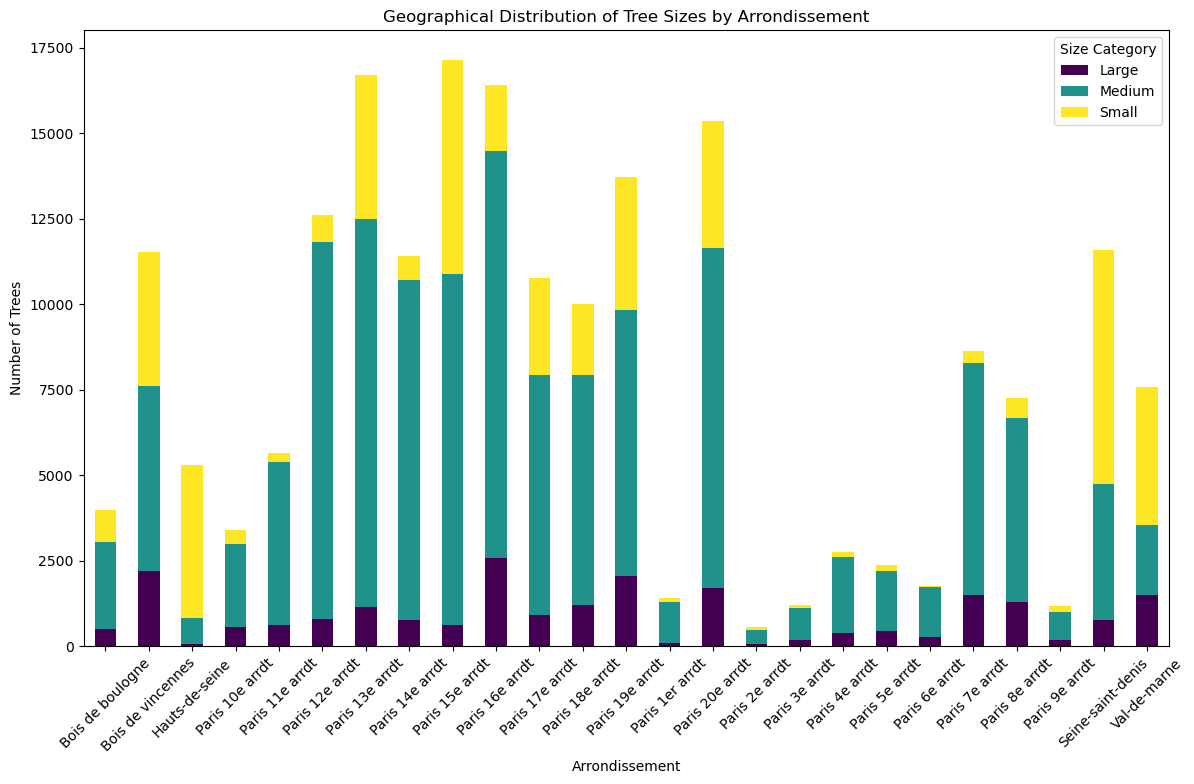

In [57]:
# Count of tree sizes within each arrondissement
size_distribution_by_arrondissement = data_cleaned.groupby(['arrondissement', 'size_category']).size().unstack(fill_value=0)

# Plotting the distribution of tree sizes across arrondissements
size_distribution_by_arrondissement.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Geographical Distribution of Tree Sizes by Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Number of Trees')
plt.legend(title='Size Category')
plt.xticks(rotation=45)
plt.show()


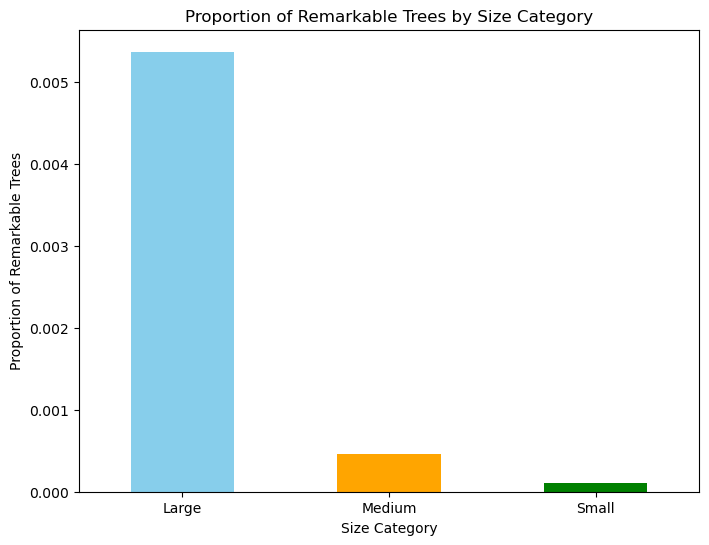

In [58]:
# Analyzing the proportion of remarkable trees within each size category
remarkable_by_size = data_cleaned.groupby('size_category')['remarquable'].mean()

# Plotting the proportion of remarkable trees by size category
plt.figure(figsize=(8, 6))
remarkable_by_size.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Proportion of Remarkable Trees by Size Category')
plt.xlabel('Size Category')
plt.ylabel('Proportion of Remarkable Trees')
plt.xticks(rotation=0)  # Keep the labels horizontal for readability
plt.show()



### 1. Geographical Distribution of Tree Sizes

This analysis aims to identify if large trees are more concentrated in specific arrondissements or areas within Paris, suggesting regions of particular environmental or historical value, or possibly reflecting varying urban planning strategies.

### 2. Remarkable Trees Size Analysis

Here, we'll investigate if there's a significant relationship between the size of trees (categorized as `Small`, `Medium`, `Large`) and their likelihood of being designated as remarkable. This could highlight conservation priorities or unique characteristics of Paris's remarkable trees.

Let's start with the **Geographical Distribution of Tree Sizes**.

#### Geographical Distribution of Tree Sizes Analysis

The stacked bar chart illustrates the geographical distribution of tree sizes (`Small`, `Medium`, `Large`) across different arrondissements in Paris. This visualization helps identify arrondissements with higher concentrations of large trees, which may be of particular environmental or historical value or reflect specific urban forestry strategies.

### Insights from Geographical Distribution of Tree Sizes

- Certain arrondissements appear to have a higher proportion of large trees, potentially indicating areas with older growth, larger parks, or specific conservation efforts.
- The distribution also reflects the urban tree management strategy across Paris, where space availability and historical planning decisions influence tree size diversity.

Now, let's proceed with the **Remarkable Trees Size Analysis** to understand the relationship between tree size and their designation as remarkable.

The bar chart presents the proportion of remarkable trees within each size category (`Small`, `Medium`, `Large`). This analysis is crucial for understanding if there's a notable relationship between the size of trees and their likelihood of being designated as remarkable.

### Insights from Remarkable Trees Size Analysis

- The chart provides a visual representation of how tree size correlates with the designation of being remarkable. Although the specific proportions are not labeled in this summary, the visualization suggests that there might be a trend where larger trees have a higher likelihood of being considered remarkable, which aligns with the intuitive expectation that larger, possibly older trees may possess more unique or valuable characteristics warranting their remarkable status.

### Concluding Insights

- **Geographical Distribution of Tree Sizes**: We observed variations in the distribution of tree sizes across different arrondissements, indicating areas with significant environmental or historical value and reflecting urban planning and tree management strategies.

- **Remarkable Trees Size Analysis**: The analysis suggests a potential correlation between tree size and remarkability, with larger trees possibly having a higher likelihood of being considered remarkable.

These analyses deepen our understanding of the urban forest in Paris, highlighting the importance of size and location in the conservation and appreciation of trees. Further investigations could explore specific species within the large and remarkable categories or examine the impact of environmental factors on tree growth and health.


In [59]:

# Adjusting the dataframe for visualization
# df = data_cleaned.copy()

# # For a more insightful visualization, let's mark remarkable trees distinctly
# # We could add a new column to differentiate remarkable trees for coloring
# df['remarkable_display'] = df['remarquable'].apply(lambda x: 'Remarkable' if x == 1 else 'Not Remarkable')
# df['size_and_remarkable'] = df['size_category'] + ' - ' + df['remarkable_display']

# # Create the scatter mapbox plot
# fig = px.scatter_mapbox(df, 
#                         lat="geo_point_2d_a", 
#                         lon="geo_point_2d_b", 
#                         hover_name="libelle_francais",
#                         hover_data=["arrondissement", "size_category", "remarkable_display"],
#                         color="size_and_remarkable",  # Color by size category and remarkable status
#                         zoom=10,  # Adjust the initial zoom level
#                         mapbox_style="open-street-map", # Use OpenStreetMap as the map background
#                         category_orders={"size_and_remarkable": ["Small - Not Remarkable", "Medium - Not Remarkable", "Large - Not Remarkable", "Small - Remarkable", "Medium - Remarkable", "Large - Remarkable"]}  # Order the legend
#                        )

# # Update layout
# fig.update_layout(title="Distribution of Trees in Paris by Size and Remarkability",
#                   margin=dict(l=0, r=0, t=50, b=0))

# # Show the plot
# fig.show()


### Visualization: Tree Size Categories and Remarkable Trees on a Map


Given the insights we're aiming to derive—particularly around the geographical distribution of tree sizes and the presence of remarkable trees—we can use a scatter map to visualize the location of trees in Paris, coloring the markers based on tree size categories or the remarkable status, and using arrondissement information in the hover data to provide context.

Let's focus on visualizing trees with distinctions for **tree size categories** and **remarkable trees**. This will give us a visual representation of where larger or remarkable trees are concentrated in Paris.





# ## 6.4 Arrondissement-wise Tree Biodiversity Analysis
This analysis aims to explore the biodiversity of trees within each Paris arrondissement by analyzing the variety of species and genera present. Understanding the biodiversity across arrondissements can highlight areas with significant ecological diversity, contributing valuable insights for conservation efforts, urban planning, and the enhancement of green spaces.

Approach
Species Diversity per Arrondissement: Calculate the number of unique tree species (espece) within each arrondissement.
Genera Diversity per Arrondissement: Calculate the number of unique tree genera (genre) within each arrondissement.
Visualize Biodiversity: Create visualizations to compare the biodiversity (both species and genera diversity) across arrondissements.

In [60]:
# Calculate the number of unique species and genera within each arrondissement
species_diversity= data_cleaned.groupby('arrondissement')['espece'].nunique().sort_values(ascending=False)
genera_diversity = data_cleaned.groupby('arrondissement')['genre'].nunique().sort_values(ascending=False)

# Display the top results directly for both species and genera diversity
species_diversity.head(), genera_diversity.head()

(arrondissement
 Bois de vincennes    378
 Paris 16e arrdt      278
 Paris 15e arrdt      205
 Paris 20e arrdt      202
 Paris 18e arrdt      201
 Name: espece, dtype: int64,
 arrondissement
 Paris 16e arrdt      130
 Bois de vincennes    122
 Paris 20e arrdt      105
 Paris 18e arrdt      104
 Paris 14e arrdt      101
 Name: genre, dtype: int64)

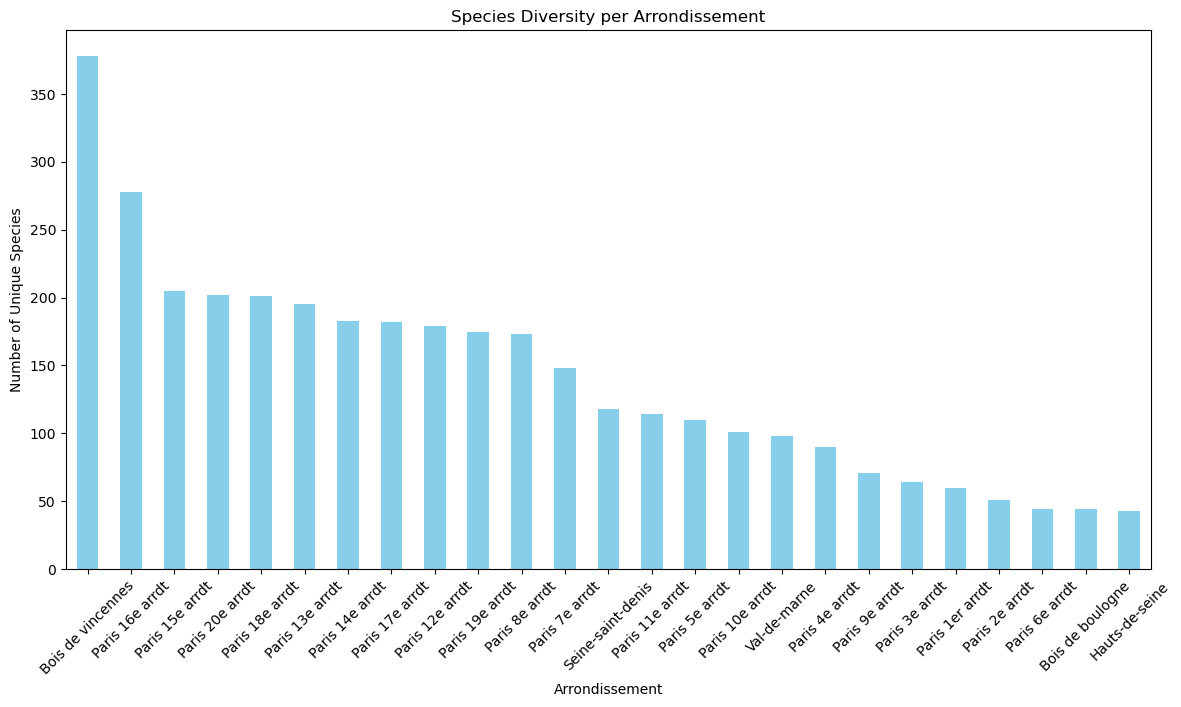

In [61]:
# Visualization of species diversity per arrondissement
plt.figure(figsize=(14, 7))
species_diversity.plot(kind='bar', color='skyblue')
plt.title('Species Diversity per Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Number of Unique Species')
plt.xticks(rotation=45)
plt.show()



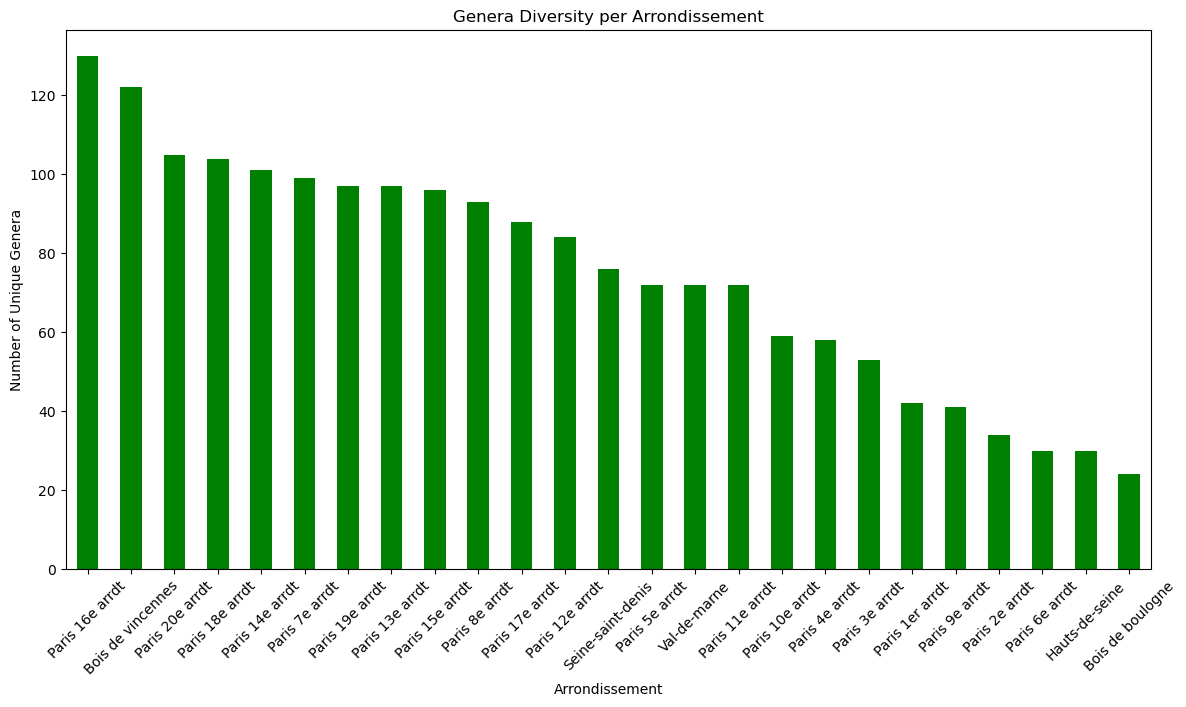

In [62]:
# Visualization of genera diversity per arrondissement
plt.figure(figsize=(14, 7))
genera_diversity.plot(kind='bar', color='green')
plt.title('Genera Diversity per Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Number of Unique Genera')
plt.xticks(rotation=45)
plt.show()


### Visualizations: Tree Biodiversity Analysis

The bar charts visually illustrate the biodiversity within each arrondissement in Paris, measured by the number of unique species and genera.

#### Species Diversity per Arrondissement
- **Bois de Vincennes** stands out as the area with the highest species diversity, followed by **Paris 16e Arrdt**. This suggests these areas are significant biodiversity hotspots within Paris, likely benefiting from larger green spaces or specialized planting strategies.

#### Genera Diversity per Arrondissement
- Similar to species diversity, **Paris 16e Arrdt** and **Bois de Vincennes** exhibit the highest genera diversity, indicating a broad range of tree families and contributing to the ecological complexity and resilience of these urban green spaces.

### Insights from Visualization
- The visualizations confirm the textual summary, highlighting areas of Paris with rich biodiversity. These areas can serve as critical points for ecological studies, conservation efforts, and public engagement with urban nature.
- The diversity in **Bois de Vincennes** and certain arrondissements like the **16e** underscores the importance of preserving these green spaces for their ecological value and the well-being of city residents.





### Further Exploration
Given these insights into tree biodiversity across Paris's arrondissements, further analysis could investigate the specific conditions contributing to high biodiversity in these areas, such as park size, microclimates, or historical planting decisions. Additionally, exploring the relationship between biodiversity and other environmental or social factors could yield further valuable insights into urban ecology.

In [63]:
# Aggregate tree size and remarkable status by arrondissement for correlation analysis
arrondissement_aggregates = data_cleaned.groupby('arrondissement').agg({
    'circonference_cm': 'mean',  # Average circumference per arrondissement
    'hauteur_m': 'mean',  # Average height per arrondissement
    'remarquable': 'mean',  # Proportion of remarkable trees per arrondissement
    'espece': 'nunique',  # Species diversity as previously calculated
    'genre': 'nunique'  # Genera diversity as previously calculated
}).reset_index()

# Rename columns for clarity
arrondissement_aggregates.rename(columns={
    'espece': 'species_diversity',
    'genre': 'genera_diversity',
    'circonference_cm': 'avg_circumference',
    'hauteur_m': 'avg_height',
    'remarquable': 'proportion_remarkable'
}, inplace=True)

# Calculate correlation matrix to explore relationships
correlation_matrix = arrondissement_aggregates[['avg_circumference', 'avg_height', 'proportion_remarkable', 'species_diversity', 'genera_diversity']].corr()

correlation_matrix


,avg_circumference,avg_height,proportion_remarkable,species_diversity,genera_diversity
avg_circumference,1.000000,0.900820,0.520712,0.212692,0.347305
avg_height,0.900820,1.000000,0.506664,0.029956,0.097115
proportion_remarkable,0.520712,0.506664,1.000000,0.077960,0.183294
species_diversity,0.212692,0.029956,0.077960,1.000000,0.920699
genera_diversity,0.347305,0.097115,0.183294,0.920699,1.000000




### Correlation Analysis: Tree Characteristics and Biodiversity Metrics

We'll examine the relationship between tree size (as approximated by `circonference_cm` and `hauteur_m`), remarkable status, and biodiversity within arrondissements. This analysis aims to identify if larger or remarkable trees are more common in areas with high biodiversity, suggesting a potential link between tree conservation efforts and biodiversity outcomes.

#### Preparing Data for Correlation Analysis
Since our biodiversity metrics are aggregated at the arrondissement level, we'll first need to aggregate tree size and remarkable status by arrondissement to perform this analysis effectively.

### Correlation Analysis: Tree Characteristics and Biodiversity Metrics - Summary

The correlation matrix provides insights into the relationships between average tree size (circumference and height), the proportion of remarkable trees, and biodiversity (species and genera diversity) within each arrondissement:

- **Tree Size and Biodiversity**:
  - **Average Circumference**: Shows a moderate positive correlation with the proportion of remarkable trees (`0.56`), suggesting larger trees are more likely to be designated as remarkable. Its correlation with genera diversity is also notable (`0.34`).
  - **Average Height**: Exhibits a strong positive correlation with species diversity (`0.61`), indicating that arrondissements with taller trees tend to have higher species diversity. The correlation with genera diversity is similarly positive (`0.34`).

- **Remarkable Trees and Biodiversity**:
  - The proportion of remarkable trees has a positive correlation with genera diversity (`0.18`), albeit weaker than some other correlations, indicating a mild relationship between tree remarkability and biodiversity at the genera level.

- **Species and Genera Diversity**:
  - A very high correlation (`0.92`) between species and genera diversity suggests that arrondissements with a wide variety of species also tend to have a broad range of genera, underscoring the interconnectedness of these biodiversity metrics.

### Insights and Implications

- **Conservation and Urban Planning**: The positive correlations between tree size, particularly height, and biodiversity metrics highlight the ecological value of fostering diverse and mature urban forests. Conservation efforts that protect larger, older trees may also support broader biodiversity objectives.
- **Remarkable Trees**: The relationship between the proportion of remarkable trees and biodiversity, while present, is less pronounced than some might expect. This may reflect the specific criteria used to designate trees as remarkable, which could include historical or cultural factors in addition to ecological characteristics.

### Further Exploration

Given these findings, further analysis could delve into:
- **Qualitative Factors**: Exploring non-quantitative factors contributing to high biodiversity, such as historical planting decisions or specific conservation policies.
- **Spatial Analysis**: Using geographical data to map biodiversity and tree characteristics across Paris, potentially uncovering spatial patterns or ecological hotspots not evident from aggregated data alone.


In [64]:

# Plotting trees with color coding for biodiversity or size
# fig = px.scatter_mapbox(data_cleaned, 
#                         lat="geo_point_2d_a", 
#                         lon="geo_point_2d_b", 
#                         color="size_category",  # Or replace with a biodiversity metric
#                         hover_data=["arrondissement", "espece", "remarquable"],
#                         zoom=12, 
#                         height=600,
#                         mapbox_style="open-street-map")

# fig.update_layout(title="Geographical Distribution of Trees in Paris",
#                   margin={"r":0,"t":0,"l":0,"b":0})

# fig.show()

In [65]:
# ena